In [1]:
!unzip -qq dataset.zip

In [73]:
import os, shutil, pathlib

original_dir = pathlib.Path("./dataset/train/")
new_base_dir = pathlib.Path("./cats_vs_dogs_7000")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=6000)
make_subset("validation", start_index=6000, end_index=6500)
make_subset("test", start_index=6500, end_index=7000)

In [74]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [75]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_208 (Conv2D)         (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_209 (Conv2D)         (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                      

In [76]:
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [77]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 12000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [78]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [79]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [80]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [81]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [82]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [83]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
375/375 [==============================] - 22s 53ms/step - loss: 0.6578 - accuracy: 0.5916 - val_loss: 0.5506 - val_accuracy: 0.7320
Epoch 2/30
375/375 [==============================] - 19s 51ms/step - loss: 0.5544 - accuracy: 0.7162 - val_loss: 0.5212 - val_accuracy: 0.7320
Epoch 3/30
375/375 [==============================] - 20s 53ms/step - loss: 0.4697 - accuracy: 0.7764 - val_loss: 0.4481 - val_accuracy: 0.7960
Epoch 4/30
375/375 [==============================] - 19s 49ms/step - loss: 0.3924 - accuracy: 0.8238 - val_loss: 0.3541 - val_accuracy: 0.8420
Epoch 5/30
375/375 [==============================] - 20s 54ms/step - loss: 0.3143 - accuracy: 0.8656 - val_loss: 0.3160 - val_accuracy: 0.8560
Epoch 6/30
375/375 [==============================] - 19s 50ms/step - loss: 0.2513 - accuracy: 0.8955 - val_loss: 0.3073 - val_accuracy: 0.8670
Epoch 7/30
375/375 [==============================] - 20s 53ms/step - loss: 0.2012 - accuracy: 0.9146 - val_loss: 0.3209 - val_accuracy:

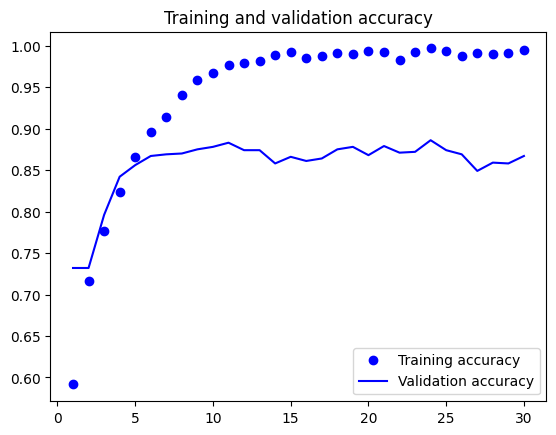

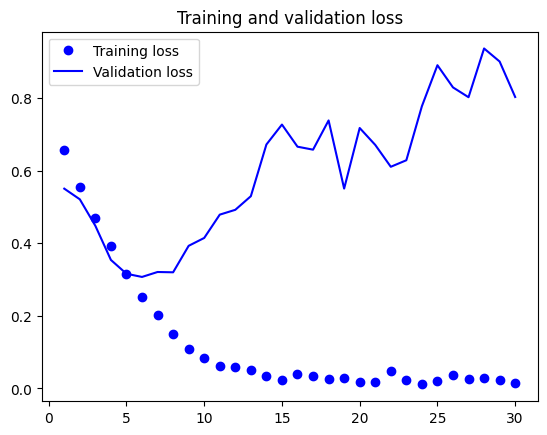

In [84]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [85]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.2954 - accuracy: 0.8620
Test accuracy: 0.862


In [86]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

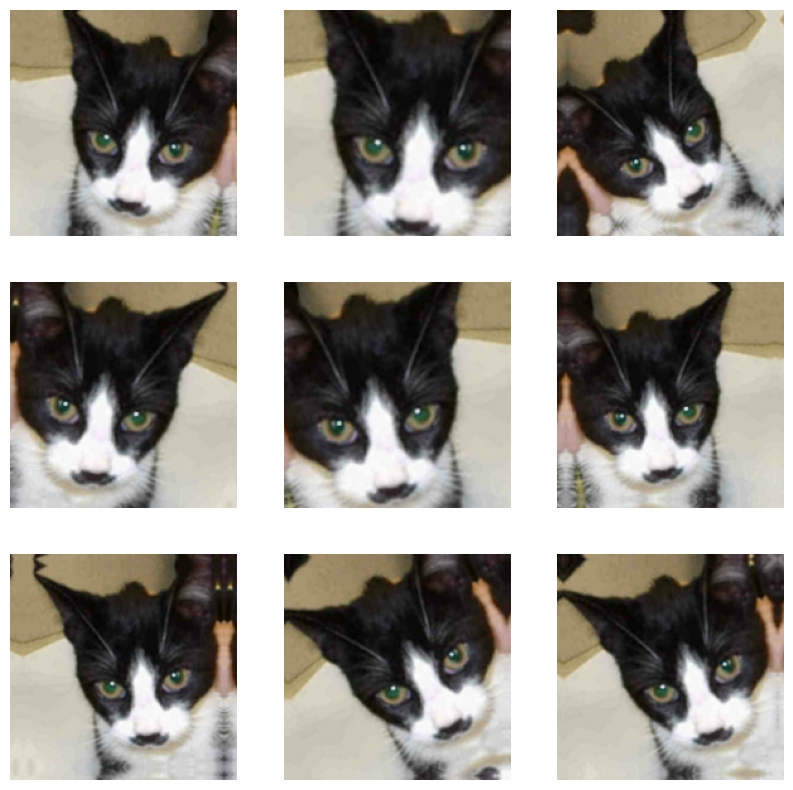

In [87]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [88]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [89]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
375/375 [==============================] - 24s 56ms/step - loss: 0.6874 - accuracy: 0.5392 - val_loss: 0.6386 - val_accuracy: 0.6010
Epoch 2/100
375/375 [==============================] - 21s 55ms/step - loss: 0.6468 - accuracy: 0.6245 - val_loss: 0.5790 - val_accuracy: 0.6950
Epoch 3/100
375/375 [==============================] - 21s 55ms/step - loss: 0.6032 - accuracy: 0.6709 - val_loss: 0.5464 - val_accuracy: 0.7240
Epoch 4/100
375/375 [==============================] - 20s 54ms/step - loss: 0.5528 - accuracy: 0.7192 - val_loss: 0.5318 - val_accuracy: 0.7530
Epoch 5/100
375/375 [==============================] - 19s 51ms/step - loss: 0.5061 - accuracy: 0.7538 - val_loss: 0.4258 - val_accuracy: 0.7970
Epoch 6/100
375/375 [==============================] - 21s 55ms/step - loss: 0.4669 - accuracy: 0.7752 - val_loss: 0.4016 - val_accuracy: 0.8170
Epoch 7/100
375/375 [==============================] - 20s 52ms/step - loss: 0.4402 - accuracy: 0.8003 - val_loss: 0.4033 - val_ac

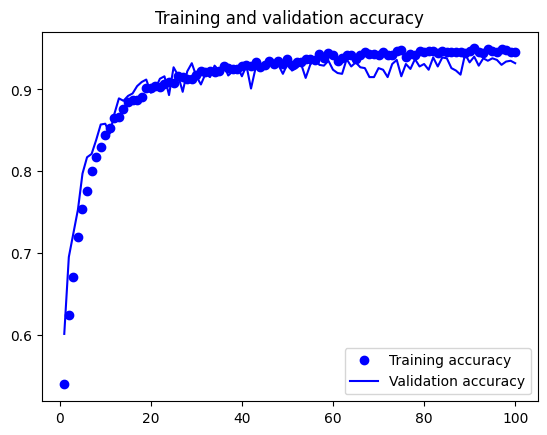

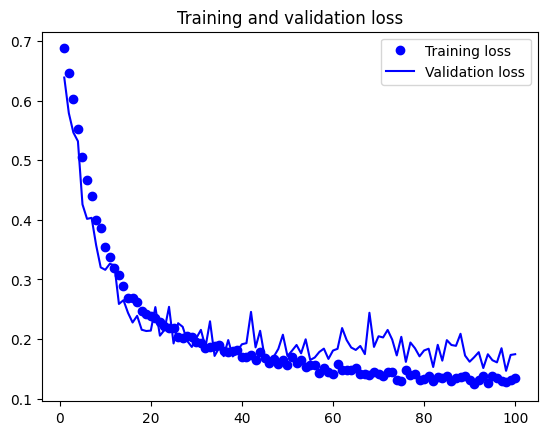

In [90]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [91]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 29ms/step - loss: 0.1668 - accuracy: 0.9330
Test accuracy: 0.933


In [92]:
conv_base = keras.applications.vgg19.VGG19(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [93]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.inception_v3.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 22ms/step


In [94]:
train_features.shape

(12000, 5, 5, 512)

In [95]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.7224 - accuracy: 0.8978 - val_loss: 0.4698 - val_accuracy: 0.9120
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2149 - accuracy: 0.9454 - val_loss: 0.2606 - val_accuracy: 0.9240
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1067 - accuracy: 0.9634 - val_loss: 0.2069 - val_accuracy: 0.9380
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0709 - accuracy: 0.9732 - val_loss: 0.1799 - val_accuracy: 0.9390
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0542 - accuracy: 0.9772 - val_loss: 0.1747 - val_accuracy: 0.9490
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0700 - accuracy: 0.9734 - val_loss: 0.2073 - val_accuracy: 0.9430
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0555 - accuracy: 0.9780 - val_loss: 0.2393 - val_accuracy: 0.9330
Epoch 

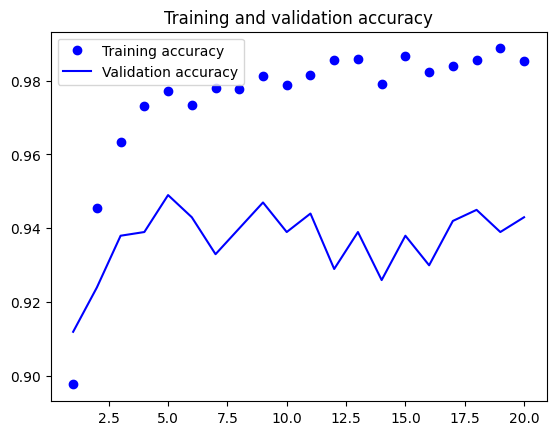

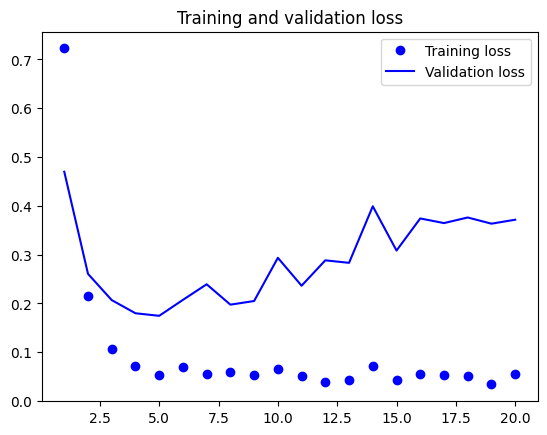

In [96]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [97]:
conv_base  = keras.applications.InceptionV3(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [98]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 188


In [99]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [100]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.inception_v3.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [101]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
375/375 [==============================] - 31s 68ms/step - loss: 5.6764 - accuracy: 0.9437 - val_loss: 1.4944 - val_accuracy: 0.9830
Epoch 2/50
375/375 [==============================] - 24s 64ms/step - loss: 3.0990 - accuracy: 0.9599 - val_loss: 1.0201 - val_accuracy: 0.9790
Epoch 3/50
375/375 [==============================] - 24s 64ms/step - loss: 1.4944 - accuracy: 0.9610 - val_loss: 0.4577 - val_accuracy: 0.9810
Epoch 4/50
375/375 [==============================] - 24s 63ms/step - loss: 0.4335 - accuracy: 0.9649 - val_loss: 0.1051 - val_accuracy: 0.9820
Epoch 5/50
375/375 [==============================] - 23s 61ms/step - loss: 0.1838 - accuracy: 0.9658 - val_loss: 0.1204 - val_accuracy: 0.9750
Epoch 6/50
375/375 [==============================] - 25s 65ms/step - loss: 0.1547 - accuracy: 0.9653 - val_loss: 0.0798 - val_accuracy: 0.9820
Epoch 7/50
375/375 [==============================] - 23s 60ms/step - loss: 0.1899 - accuracy: 0.9660 - val_loss: 0.0983 - val_accuracy:

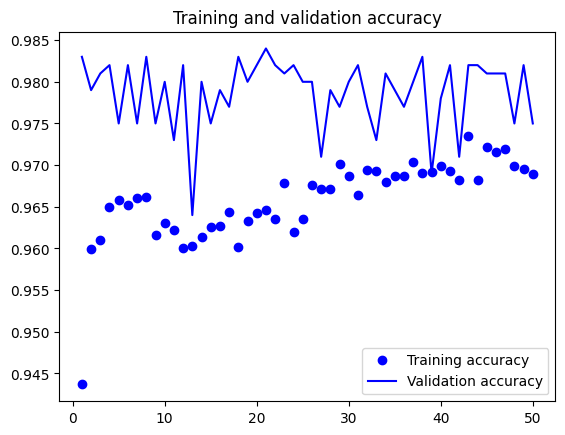

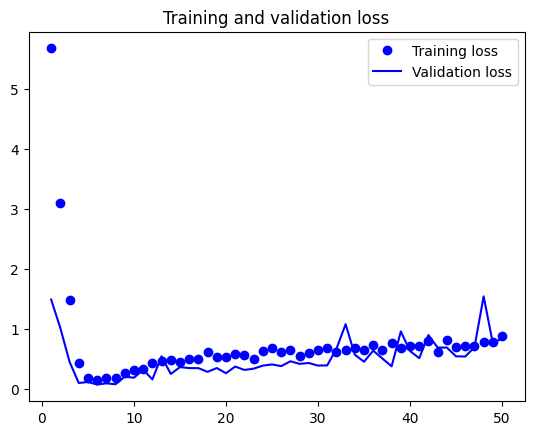

In [102]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [103]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 48ms/step - loss: 0.0852 - accuracy: 0.9820
Test accuracy: 0.982


In [104]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_218 (Conv2D)            (None, None, None,   864         ['input_17[0][0]']               
                                32)                                                               
                                                                                                  
 batch_normalization_188 (Batch  (None, None, None,   96         ['conv2d_218[0][0]']             
 Normalization)                 32)                                                    

In [105]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [106]:
from keras.optimizers import Adam
optimizer = Adam(lr=0.001)
model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
375/375 [==============================] - 31s 67ms/step - loss: 0.8067 - accuracy: 0.9722 - val_loss: 0.7232 - val_accuracy: 0.9780
Epoch 2/30
375/375 [==============================] - 24s 63ms/step - loss: 0.8314 - accuracy: 0.9722 - val_loss: 0.5109 - val_accuracy: 0.9830
Epoch 3/30
375/375 [==============================] - 23s 61ms/step - loss: 0.7451 - accuracy: 0.9730 - val_loss: 0.8463 - val_accuracy: 0.9770
Epoch 4/30
375/375 [==============================] - 23s 61ms/step - loss: 0.8269 - accuracy: 0.9722 - val_loss: 0.5978 - val_accuracy: 0.9770
Epoch 5/30
375/375 [==============================] - 23s 61ms/step - loss: 0.8076 - accuracy: 0.9724 - val_loss: 0.6129 - val_accuracy: 0.9800
Epoch 6/30
375/375 [==============================] - 23s 61ms/step - loss: 0.7559 - accuracy: 0.9735 - val_loss: 0.6216 - val_accuracy: 0.9780
Epoch 7/30
375/375 [==============================] - 23s 61ms/step - loss: 0.7641 - accuracy: 0.9739 - val_loss: 0.8208 - val_accuracy:

In [107]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 64ms/step - loss: 0.3871 - accuracy: 0.9850
Test accuracy: 0.985
